군집화 (Clusering) - k -means algorithm

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

-iris data를 차원축소

In [78]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [79]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

In [80]:
df = pd.DataFrame(iris.data, columns=['sl','sw','pl','pw'])
df['PC1'] = iris_pca[:,0]
df['PC2'] = iris_pca[:,1]
df.head()

,sl,sw,pl,pw,PC1,PC2
0,5.1,3.5,1.4,0.2,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,-2.389842,0.646835


 - K- means 모델 생성/학습

In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)

In [82]:
kmeans.fit(iris_std)

KMeans(n_clusters=3, random_state=2021)

In [83]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [84]:
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.tail()

,sl,sw,pl,pw,PC1,PC2,target,cluster
145,6.7,3.0,5.2,2.3,1.870503,0.386966,2,1
146,6.3,2.5,5.0,1.9,1.564580,-0.896687,2,2
147,6.5,3.0,5.2,2.0,1.521170,0.269069,2,1
148,6.2,3.4,5.4,2.3,1.372788,1.011254,2,1
149,5.9,3.0,5.1,1.8,0.960656,-0.024332,2,2


In [85]:
df.groupby(['target', 'cluster']).count()

sl  sw  pl  pw  PC1  PC2
target cluster                          
0      0        50  50  50  50   50   50
1      1        11  11  11  11   11   11
       2        39  39  39  39   39   39
2      1        36  36  36  36   36   36
       2        14  14  14  14   14   14

- 데이터 시각화

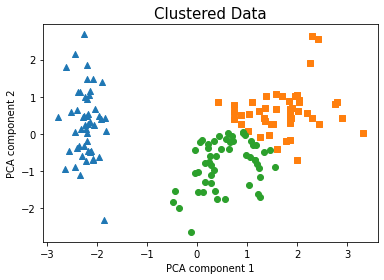

In [86]:
# 군집화한 결과를 차원축소하여 시각화
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster == i]['PC1']
    y_axis_data = df[df.cluster == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('Clustered Data', fontsize=15)
plt.show()

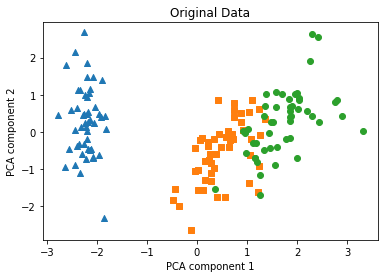

In [87]:
for i, marker in enumerate(markers):
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=iris.target_names[i])

plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('Original Data')
plt.show()

- 두개의 그림 비교하기

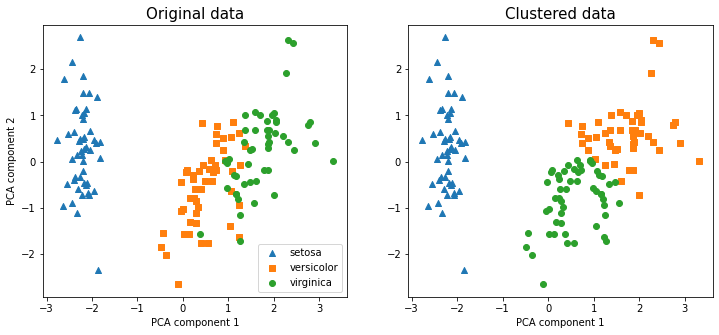

In [88]:
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for k, column in enumerate(['target', 'cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    if k == 0:                  #Original
        ax.set_title('Original data', fontsize = 15)
        ax.set_ylabel('PCA component 2')
        ax.legend()

    else:                       #Cluster
        ax.set_title('Clustered data', fontsize = 15)
    ax.set_xlabel('PCA component 1')
   
plt.show()

#반복문과 조건문과 결합 #멀티플롯